In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
CD_shapley = pd.read_csv('../../../Meta_disease_Jun/CD_binary_shapley_values.csv', sep = '\t', index_col = 0) 
metadata = pd.read_csv('../../../Meta_disease_Jun/CD/CD_Franzosa_Chinese_212.txt', sep = '\t')
CD_metadata = metadata[metadata['disease'] == 'CD']
Control_metadata = metadata[metadata['disease'] == 'Healthy']
CD_shapley_control = CD_shapley[CD_shapley.index.isin(Control_metadata['featureid'])]
CD_shapley_control_mean = pd.DataFrame(CD_shapley_control.mean(), columns=['shapley mean'])
CD_shapley_case = CD_shapley[CD_shapley.index.isin(CD_metadata['featureid'])]
CD_shapley_case_mean = pd.DataFrame(CD_shapley_case.mean(), columns=['shapley mean'])

In [3]:
CD_df = pd.read_csv('../../../Meta_disease_Jun/Pydeseq2_microbes/CD/res_df.tsv', sep = '\t', index_col = 0) 
CD_df["CI_95"] = CD_df["log2FoldChange"] + CD_df['lfcSE'] * 1.96
CD_df["CI_5" ] = CD_df["log2FoldChange"] - CD_df['lfcSE'] * 1.96
CD_df_filtered = CD_df[CD_df.index.isin(CD_shapley.T.index)]
CD_df_filtered = CD_df_filtered[ ~((CD_df_filtered['CI_95'] > 0) & (CD_df_filtered['CI_5'] < 0))]

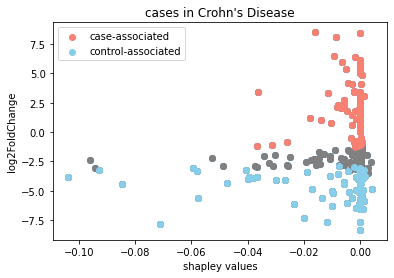

In [4]:
CD_df_shapley = pd.merge(CD_shapley_case_mean, CD_df_filtered, left_index=True, right_index=True)

# create a sample dataframe
df = CD_df_shapley
df = df.sort_values(by = 'shapley mean')

K = 100
top_K = df.sort_values("CI_5", ascending = False).head(K)
bot_K = df.sort_values("CI_95", ascending = True).head(K)

# concatenate the two dataframes
plt.scatter(df['shapley mean'], df['log2FoldChange'])

# create a scatter plot
plt.scatter(df['shapley mean'], df['log2FoldChange'],color='gray')

# color the top_K points in red
plt.scatter(top_K['shapley mean'], top_K['log2FoldChange'], color='salmon',label='case-associated')

# color the bot_K points in blue
plt.scatter(bot_K['shapley mean'], bot_K['log2FoldChange'], color='skyblue', label='control-associated')

# set the title and axis labels
plt.title('cases in Crohn\'s Disease')
plt.xlabel('shapley values')
plt.ylabel('log2FoldChange')
plt.legend()

#plt.show()
plt.savefig('Figure_CD_df_shapley_color_in_case.pdf')

In [5]:
CD_case_sorted = CD_df_shapley.sort_values(by='shapley mean', ascending=True)
CD_case_sorted.to_csv('../table/CD_case_sorted_shapley_all384.txt', sep = '\t')

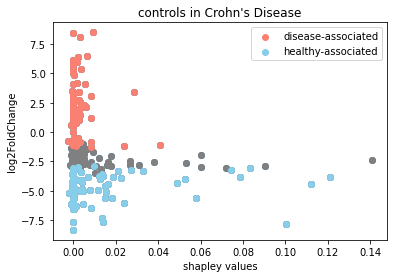

In [6]:
CD_df_shapley = pd.merge(CD_shapley_control_mean, CD_df_filtered, left_index=True, right_index=True)

# create a sample dataframe
df = CD_df_shapley
df = df.sort_values(by = 'shapley mean')

K = 100
top_K = df.sort_values("CI_5", ascending = False).head(K)
bot_K = df.sort_values("CI_95", ascending = True).head(K)

# concatenate the two dataframes
plt.scatter(df['shapley mean'], df['log2FoldChange'])

# create a scatter plot
plt.scatter(df['shapley mean'], df['log2FoldChange'],color='gray')

# color the top_K points in red
plt.scatter(top_K['shapley mean'], top_K['log2FoldChange'], color='salmon', label='disease-associated')

# color the bot_K points in blue
plt.scatter(bot_K['shapley mean'], bot_K['log2FoldChange'], color='skyblue',label='healthy-associated')

# set the title and axis labels
plt.title('controls in Crohn\'s Disease')
plt.xlabel('shapley values')
plt.ylabel('log2FoldChange')
plt.legend()
#plt.show()
plt.savefig('Figure_CD_df_shapley_color_in_control.pdf')

In [7]:
CD_control_sorted = CD_df_shapley.sort_values(by='shapley mean', ascending=False)
CD_control_sorted.to_csv('../table/CD_control_sorted_shapley_all384.txt', sep = '\t')

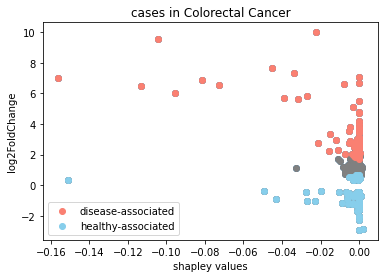

In [8]:
#CRC
CRC_shapley = pd.read_csv('../../../Meta_disease_Jun/CRC_binary_shapley_values.csv', sep = '\t', index_col = 0) 
metadata = pd.read_csv('../../../Meta_disease_Jun/CRC/metadata_CRC_copy.txt', sep = '\t')
CRC_metadata = metadata[metadata['disease'] == 'CRC']
Control_metadata = metadata[metadata['disease'] == 'Healthy']
CRC_shapley_control = CRC_shapley[CRC_shapley.index.isin(Control_metadata['featureid'])]
CRC_shapley_control_mean = pd.DataFrame(CRC_shapley_control.mean(), columns=['shapley mean'])
CRC_shapley_case = CRC_shapley[CRC_shapley.index.isin(CRC_metadata['featureid'])]
CRC_shapley_case_mean = pd.DataFrame(CRC_shapley_case.mean(), columns=['shapley mean'])

CRC_df = pd.read_csv('../../../Meta_disease_Jun/Pydeseq2_microbes/CRC/res_df.tsv', sep = '\t', index_col = 0) 
CRC_df["CI_95"] = CRC_df["log2FoldChange"] + CRC_df['lfcSE'] * 1.96
CRC_df["CI_5" ] = CRC_df["log2FoldChange"] - CRC_df['lfcSE'] * 1.96
CRC_df_filtered = CRC_df[CRC_df.index.isin(CRC_shapley.T.index)]
CRC_df_filtered = CRC_df_filtered[ ~((CRC_df_filtered['CI_95'] > 0) & (CRC_df_filtered['CI_5'] < 0))]

CRC_df_shapley = pd.merge(CRC_shapley_case_mean, CRC_df_filtered, left_index=True, right_index=True)

# create a sample dataframe
df = CRC_df_shapley
df = df.sort_values(by = 'shapley mean')

K = 100
top_K = df.sort_values("CI_5", ascending = False).head(K)
bot_K = df.sort_values("CI_95", ascending = True).head(K)

# concatenate the two dataframes
plt.scatter(df['shapley mean'], df['log2FoldChange'])

# create a scatter plot
plt.scatter(df['shapley mean'], df['log2FoldChange'],color='gray')

# color the top_K points in red
plt.scatter(top_K['shapley mean'], top_K['log2FoldChange'], color='salmon',label='disease-associated')

# color the bot_K points in blue
plt.scatter(bot_K['shapley mean'], bot_K['log2FoldChange'], color='skyblue', label='healthy-associated')

# set the title and axis labels
plt.title('cases in Colorectal Cancer')
plt.xlabel('shapley values')
plt.ylabel('log2FoldChange')
plt.legend()

#plt.show()
plt.savefig('Figure_CRC_df_shapley_color_in_case.pdf')

In [9]:
CRC_case_sorted = CRC_df_shapley.sort_values(by='shapley mean', ascending=True)
CRC_case_sorted.to_csv('../table/CRC_case_sorted_shapley_all515.txt', sep = '\t')

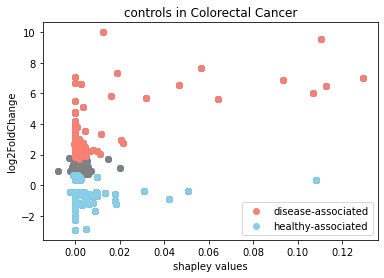

In [10]:
CRC_df_shapley = pd.merge(CRC_shapley_control_mean, CRC_df_filtered, left_index=True, right_index=True)

# create a sample dataframe
df = CRC_df_shapley
df = df.sort_values(by = 'shapley mean')

K = 100
top_K = df.sort_values("CI_5", ascending = False).head(K)
bot_K = df.sort_values("CI_95", ascending = True).head(K)

# concatenate the two dataframes
plt.scatter(df['shapley mean'], df['log2FoldChange'])

# create a scatter plot
plt.scatter(df['shapley mean'], df['log2FoldChange'],color='gray')

# color the top_K points in red
plt.scatter(top_K['shapley mean'], top_K['log2FoldChange'], color='salmon', label='disease-associated')

# color the bot_K points in blue
plt.scatter(bot_K['shapley mean'], bot_K['log2FoldChange'], color='skyblue',label='healthy-associated')

# set the title and axis labels
plt.title('controls in Colorectal Cancer')
plt.xlabel('shapley values')
plt.ylabel('log2FoldChange')
plt.legend()
#plt.show()
plt.savefig('Figure_CRC_df_shapley_color_in_control.pdf')

In [11]:
CRC_control_sorted = CRC_df_shapley.sort_values(by='shapley mean', ascending=False)
CRC_control_sorted.to_csv('../table/CRC_control_sorted_shapley_all515.txt', sep = '\t')